In [9]:
import time
import pickle
import random
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
import scipy.optimize as op

import copy 

In [5]:
from utils import mnist_reader
x_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
x_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')
m, n = X_train.shape
Y_train = pd.get_dummies(y_train)
Y_test = pd.get_dummies(y_test)

In [75]:
def sigmoid(values):
    return 1 / (1 + np.exp(-values))

def forward_setup(nodos,X,Y,hidden_layers):
    nodos.insert(0,X.shape[1])
    nodos.append(len(Y[0]))
    nodes = [i + 1 for i in nodos]

    # red, mesh de thetas 
    thetas = []
    # por el momento le voy a poner mas 1 por la output layer 
    for i in range(hidden_layers + 1):
        temp_primero = np.expand_dims(np.asarray([(np.random.randn() / 5) for i in range(nodes[i])],dtype='float64'),1)
        thetas.append(np.matrix(np.asarray(
            [temp_primero for i in range(nodos[i + 1])]
            )))
    return thetas

def forward_prop(X,thetas):
    inicial = X.T      
    trace = [inicial]
    for i in range(len(thetas)):
        interno = np.matmul(
            thetas[i],
            np.vstack(
                [np.expand_dims(np.ones(trace[i].shape[1]),0),
                trace[i]]
                )
        )
        trace.append(sigmoid(interno))
    return trace 

def backward_prop(thetas,shapes,X,Y):
    m,_ = X.shape
    # regresar a su normalidad 
    thetas = unflatten_zetas(thetas,shapes)
    delta = copy.deepcopy(thetas)
    for i in delta: i[:] = 0
    activation_trace = forward_prop(X,thetas)
    print("a", activation_trace[-1].shape)
    print("Y", Y.T.shape)
    first_delta = activation_trace[-1] - Y.T
    deltas = [first_delta]
    # backward prop 
    print("1st delta:", first_delta.shape)
    print("Thetas", thetas[1].T[1:,:].shape)
    print('a:', activation_trace[1].shape)
    for i in reversed(range(1,len(thetas))):
        first_delta = np.multiply(
            np.matmul(thetas[i].T[1:,:],first_delta),
            np.multiply(activation_trace[i],(1-activation_trace[i]))
            )
        deltas.append(first_delta)
    deltas.append(None)

    deltas = list(reversed(deltas))
    for i in range(len(delta)):
        temp_shape = activation_trace[i].shape
        print("i:", i)
        print("temp_shape:", temp_shape)
        print("AAAA:", activation_trace[i].shape)
        print("Deltas: ", deltas[i + 1].shape)
        multi_res = np.matmul(
            deltas[i + 1],
            np.vstack([np.ones((1,temp_shape[1])),activation_trace[i]]).T
            )
        print("delta[i]", delta[i].shape)
        print("multires ",multi_res.shape)
        print("m", m)
        delta[i] += multi_res / m
    return flatten_zetas(delta)[0]
    
def flatten_zetas(thetas):
    flat_zetas = np.asarray([])
    shapes = []
    for i in thetas:
        shapes.append(i.shape)
        flat_zetas = np.concatenate((flat_zetas,np.ravel(i)))
    return (flat_zetas,shapes)

def unflatten_zetas(flat_thetas,shapes):
    print(shapes)
    print(flat_thetas)
    res = []
    for i in shapes:
        cantidad = i[0] * i[1]  
        res.append(flat_thetas[:cantidad].reshape(i))
    return res 

def cost(thetas,shapes,X,Y):
    thetas = unflatten_zetas(thetas,shapes)
    h = forward_prop(X,thetas)[-1]
    calculate = (Y * np.log(h).T) + ((1 - Y) * np.log(1 - h).T)
    print(np.sum(calculate) / (- X.shape[0]))
    return np.sum(calculate) / (- X.shape[0])

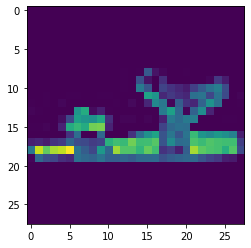

5


In [56]:
example = plt.imshow(x_train[-1].reshape(28,28))
plt.show()
print(y_train[-1])
x_train_ingreso = x_train / 1000
x_test_ingreso = x_test / 1000
categorias = 10
y_train_ingreso = (np.expand_dims(y_train,1) == np.arange(categorias)).astype(int)
y_test_ingreso = (np.expand_dims(y_test,1) == np.arange(categorias)).astype(int)


In [28]:
y_train_ingreso

array([[0, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [35]:
architecture = [500]
thetas = forward_setup(architecture,x_train_ingreso, y_train_ingreso, len(architecture))
flat_thetas = flatten_zetas(thetas)
print(flat_thetas[1])
print(flat_thetas[0])
print(thetas)

[(500, 785), (10, 501)]
[-0.33611428 -0.10646436 -0.19824408 ...  0.06778271  0.34318333
 -0.20871149]
[matrix([[-0.33611428, -0.10646436, -0.19824408, ...,  0.19708144,
         -0.23616315,  0.1803861 ],
        [-0.33611428, -0.10646436, -0.19824408, ...,  0.19708144,
         -0.23616315,  0.1803861 ],
        [-0.33611428, -0.10646436, -0.19824408, ...,  0.19708144,
         -0.23616315,  0.1803861 ],
        ...,
        [-0.33611428, -0.10646436, -0.19824408, ...,  0.19708144,
         -0.23616315,  0.1803861 ],
        [-0.33611428, -0.10646436, -0.19824408, ...,  0.19708144,
         -0.23616315,  0.1803861 ],
        [-0.33611428, -0.10646436, -0.19824408, ...,  0.19708144,
         -0.23616315,  0.1803861 ]]), matrix([[-0.02445318,  0.07652733,  0.43564926, ...,  0.06778271,
          0.34318333, -0.20871149],
        [-0.02445318,  0.07652733,  0.43564926, ...,  0.06778271,
          0.34318333, -0.20871149],
        [-0.02445318,  0.07652733,  0.43564926, ...,  0.06778271,

In [55]:
flat_thetas

(array([-0.33611428, -0.10646436, -0.19824408, ...,  0.06778271,
         0.34318333, -0.20871149]),
 [(500, 785), (10, 501)])

In [29]:
forward_prop(x_train_ingreso, thetas)

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 matrix([[0.62659561, 0.71645686, 0.61458602, ..., 0.42748098, 0.64930056,
          0.5275592 ],
         [0.62659561, 0.71645686, 0.61458602, ..., 0.42748098, 0.64930056,
          0.5275592 ],
         [0.62659561, 0.71645686, 0.61458602, ..., 0.42748098, 0.64930056,
          0.5275592 ],
         ...,
         [0.62659561, 0.71645686, 0.61458602, ..., 0.42748098, 0.64930056,
          0.5275592 ],
         [0.62659561, 0.71645686, 0.61458602, ..., 0.42748098, 0.64930056,
          0.5275592 ],
         [0.62659561, 0.71645686, 0.61458602, ..., 0.42748098, 0.64930056,
          0.5275592 ]]),
 matrix([[0.99750462, 0.99893155, 0.99720538, ..., 0.9838272 , 0.99798576,
          0.99365922],
         [0.99750462, 0.99893155, 0.99720538, ...

In [38]:
x_train_ingreso

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
y_train_ingreso

array([[0, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [43]:
print(flat_thetas[0])
print(flat_thetas[0].shape)

[-0.33611428 -0.10646436 -0.19824408 ...  0.06778271  0.34318333
 -0.20871149]
(397510,)


In [77]:
start = time.time()

res = op.minimize(
    fun=cost,
    x0=flat_thetas[0],
    args=(flat_thetas[1],x_train_ingreso,y_train_ingreso),
    method='L-BFGS-B',
    jac=backward_prop,
    options={
        'disp':True,
        'maxiter':500
    }
)

end = time.time()

[(500, 785), (10, 501)]
[-0.33611428 -0.10646436 -0.19824408 ...  0.06778271  0.34318333
 -0.20871149]
4.227675390708339
[(500, 785), (10, 501)]
[-0.33611428 -0.10646436 -0.19824408 ...  0.06778271  0.34318333
 -0.20871149]
a (10, 60000)
Y (10, 60000)
1st delta: (10, 60000)
Thetas (500, 10)
a: (500, 60000)
i: 0
temp_shape: (784, 60000)
AAAA: (784, 60000)
Deltas:  (500, 60000)
delta[i] (500, 785)
multires  (500, 785)
m 60000
i: 1
temp_shape: (500, 60000)
AAAA: (500, 60000)
Deltas:  (10, 60000)
delta[i] (10, 501)
multires  (10, 501)
m 60000
[(500, 785), (10, 501)]
[-0.33441598 -0.10646436 -0.19824408 ...  0.07478942  0.35019004
 -0.20170478]


KeyboardInterrupt: 